In [ ]:
!pip install shap

In [2]:
import shap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from yellowbrick.model_selection import LearningCurve
from bayes_opt import BayesianOptimization, UtilityFunction
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
from google.colab import files
uploaded = files.upload()

In [4]:
data = pd.read_csv("/content/data_final.csv")

In [5]:
def metrics():
  R2 = r2_score(y_test, gbr.predict(X_test))
  print("R2 Score(Test): {:.5f}".format(R2))
  R2 = r2_score(y_train, gbr.predict(X_train))
  print("R2 Score(Train): {:.5f}".format(R2))
  mse = mean_squared_error(y_test, gbr.predict(X_test))
  print("MSE(Test): {:.5f}".format(mse))
  mse = mean_squared_error(y_train, gbr.predict(X_train))
  print("MSE(Train): {:.5f}".format(mse))
  mae = mean_absolute_error(y_test, gbr.predict(X_test))
  print("MAE(Test): {:.5f}".format(mae))
  mae = mean_absolute_error(y_train, gbr.predict(X_train))
  print("MAE(Train): {:.5f}".format(mae))

**Only XRD features**

In [6]:
data_XRD =  data.drop(columns=['PL_intensity_1', 'PL_intensity_2','PL_fwhm_1',
                               'PL_fwhm_2','PL_peak_positions_1','PL_peak_positions_2',
                               'PL_relative_intensity_1','PL_relative_intensity_2',
                               'Urbach_energy','Bandgap'])

In [7]:
X = data_XRD.drop('delta(eff)', axis=1)
y = data_XRD['delta(eff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5802)

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.012, max_depth=10, min_samples_split=7,loss="huber",random_state=0)
gbr.fit(X_train, y_train)

In [9]:
metrics()

R2 Score(Test): 0.92666
R2 Score(Train): 0.94833
MSE(Test): 0.01583
MSE(Train): 0.01370
MAE(Test): 0.11409
MAE(Train): 0.10023


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


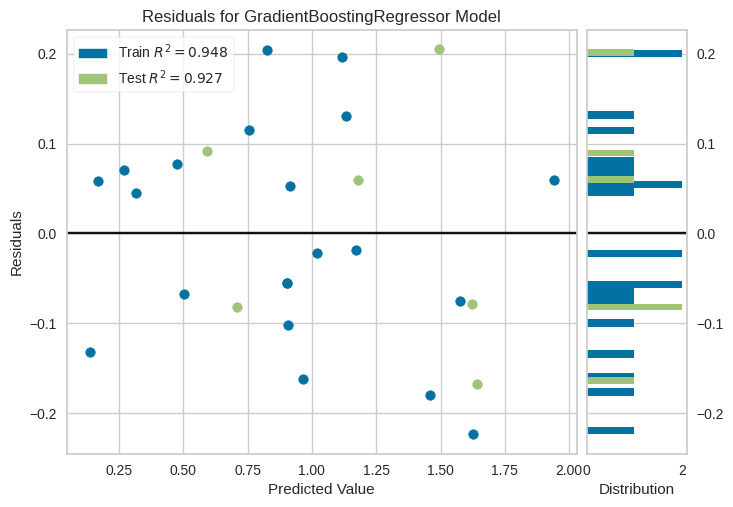

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [10]:
visualizer = ResidualsPlot(gbr,train_alpha=1,test_alpha=1)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


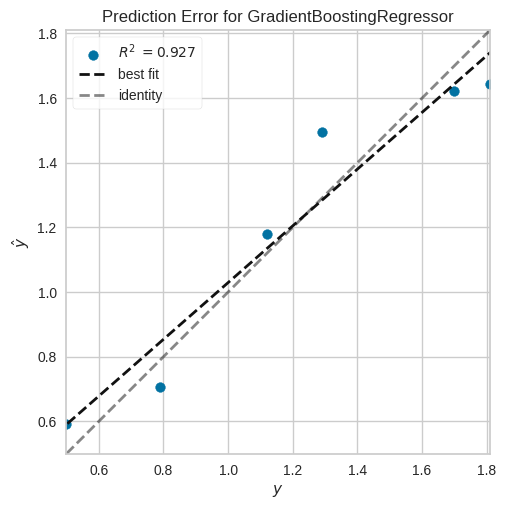

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [11]:
visualizer = PredictionError(gbr,alpha=1)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

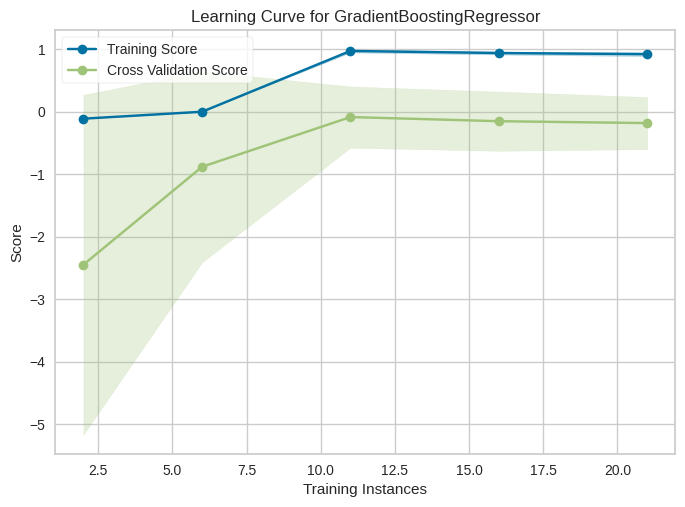

<Axes: title={'center': 'Learning Curve for GradientBoostingRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [12]:
visualizer = LearningCurve(gbr,cv=5)
visualizer.fit(X, y)
visualizer.show()

Feature importance

In [13]:
feature_names = X.columns.tolist()
gb = gbr.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gb})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,Drop,0.395089
13,Int1,0.118074
19,rel_int1,0.072302
26,dis2,0.049162
17,Int5,0.040142
29,dis5,0.031891
5,FWHM5,0.029740
25,dis1,0.025402
18,Int6,0.023378
4,FWHM4,0.022443


In [14]:
explainer = shap.Explainer(gbr)
shap_values = explainer.shap_values(X)

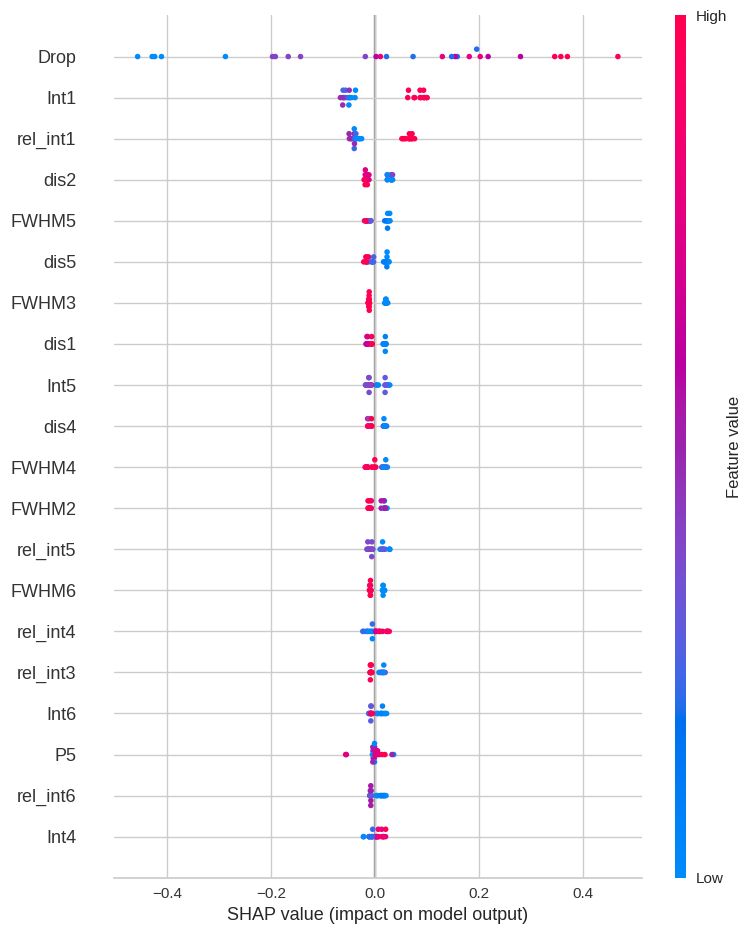

In [15]:
shap.summary_plot(shap_values, X)

In [16]:
shap.initjs()

Shap force plots

In [ ]:
#Sample 1
for i in range(0,6):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(26, 4)
)

In [ ]:
#Sample 2
for i in range(6,9):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(26, 4)
)

In [ ]:
#Sample 3
for i in range(9,15):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(26, 4)
)

In [ ]:
#Sample 4
for i in range(15,21):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(26, 4)
)

In [ ]:
#Sample 5
for i in range(21,27):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(26, 4)
)

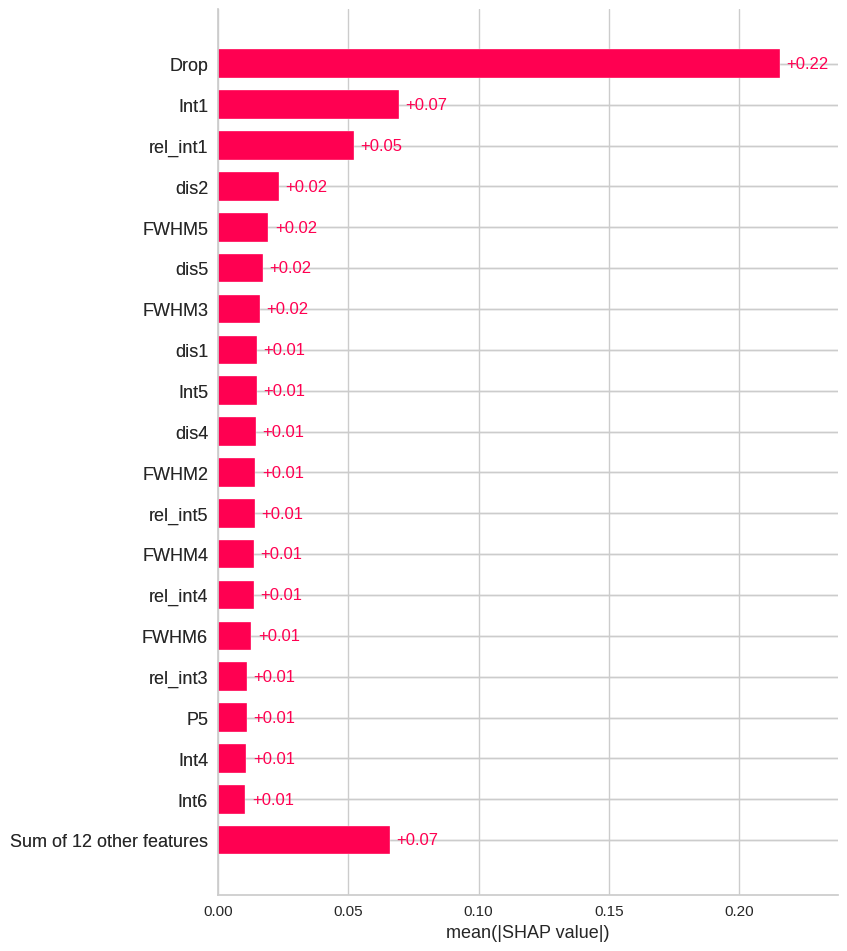

In [22]:
explainer = shap.Explainer(gbr, X)
shap_values = explainer(X)
shap.plots.bar(shap_values,max_display=20)



---



**XRD + PL + UV features**

In [23]:
X = data.drop('delta(eff)', axis=1)
y = data['delta(eff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5802)

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.012, max_depth=10, min_samples_split=7,loss="huber",random_state=5802)
gbr.fit(X_train, y_train)

In [ ]:
metrics()

In [26]:
feature_names = X.columns.tolist()
gb = gbr.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gb})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df

,Feature,Importance
0,Drop,0.395089
35,PL_peak_positions_1,0.085898
34,PL_fwhm_2,0.056125
19,rel_int1,0.051515
32,PL_intensity_2,0.044988
13,Int1,0.031791
26,dis2,0.029794
5,FWHM5,0.029198
24,rel_int6,0.027644
6,FWHM6,0.024768


In [27]:
explainer = shap.Explainer(gbr)
shap_values = explainer.shap_values(X)

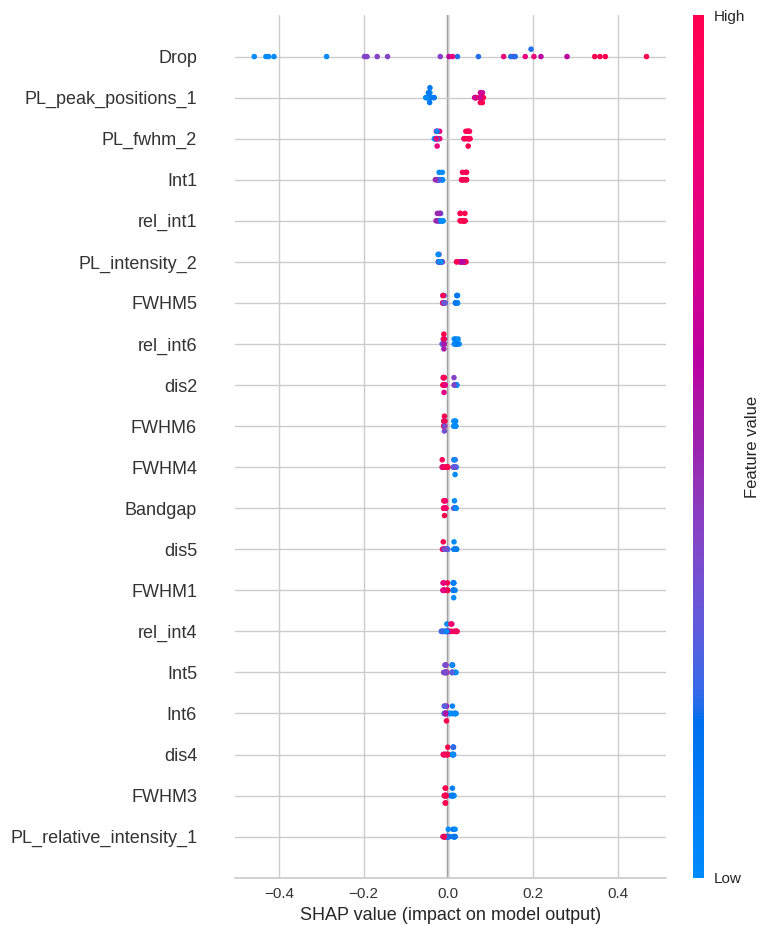

In [28]:
shap.summary_plot(shap_values, X)

Shap force plots

In [ ]:
#Sample 1
for i in range(0,6):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(26, 4)
)

In [ ]:
#Sample 2
for i in range(6,9):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(26, 4)
)

In [ ]:
#Sample 3
for i in range(9,15):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(26, 4)
)

In [ ]:
#Sample 4
for i in range(15,21):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(26, 4)
)

In [ ]:
#Sample 5
for i in range(21,27):
  shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[0],
    matplotlib=True,
    figsize=(26, 4)
)

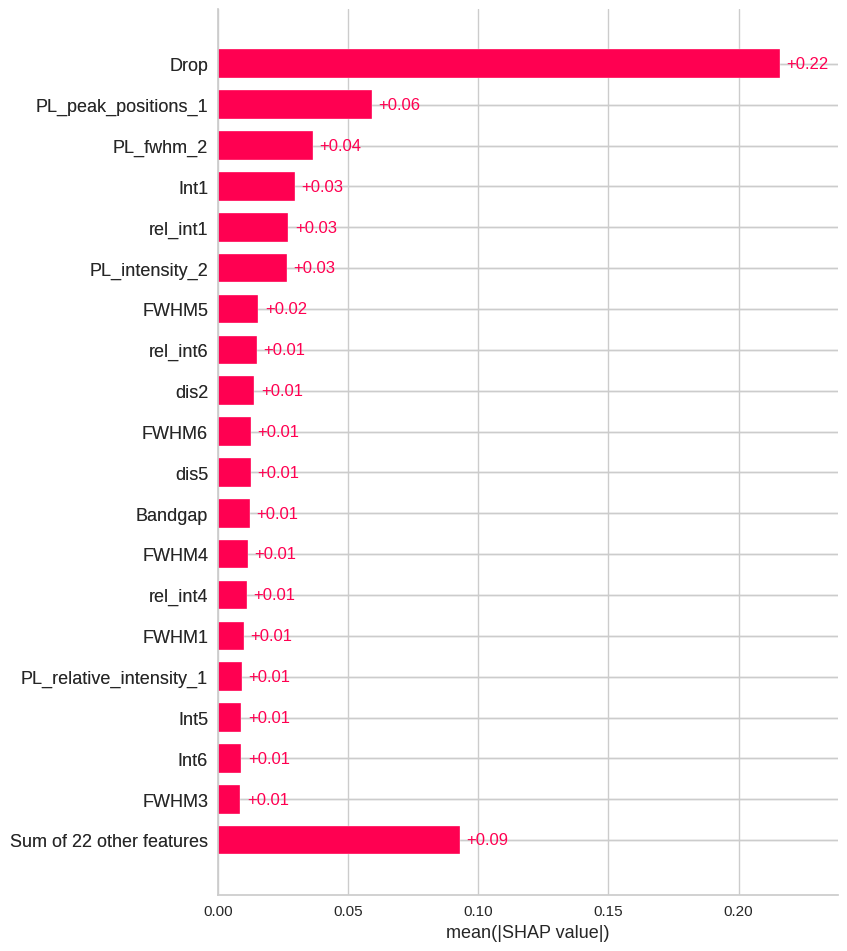

In [34]:
explainer = shap.Explainer(gbr, X)
shap_values = explainer(X)
shap.plots.bar(shap_values,max_display=20)



---



---



**XRD parameters with only relative parameters**

In [35]:
data_XRD_rel =  data.drop(columns=['PL_intensity_1', 'PL_intensity_2','PL_fwhm_1',
                               'PL_fwhm_2','PL_peak_positions_1','PL_peak_positions_2',
                               'PL_relative_intensity_1','PL_relative_intensity_2',
                               'Urbach_energy','Bandgap','Int1','Int2','Int3','Int4','Int5','Int6'])

In [36]:
X = data_XRD_rel.drop('delta(eff)', axis=1)
y = data_XRD_rel['delta(eff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5802)

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.012, max_depth=10, min_samples_split=7,loss="huber",random_state=5802)
gbr.fit(X_train, y_train)

In [38]:
metrics()

R2 Score(Test): 0.92666
R2 Score(Train): 0.94833
MSE(Test): 0.01583
MSE(Train): 0.01370
MAE(Test): 0.11409
MAE(Train): 0.10023


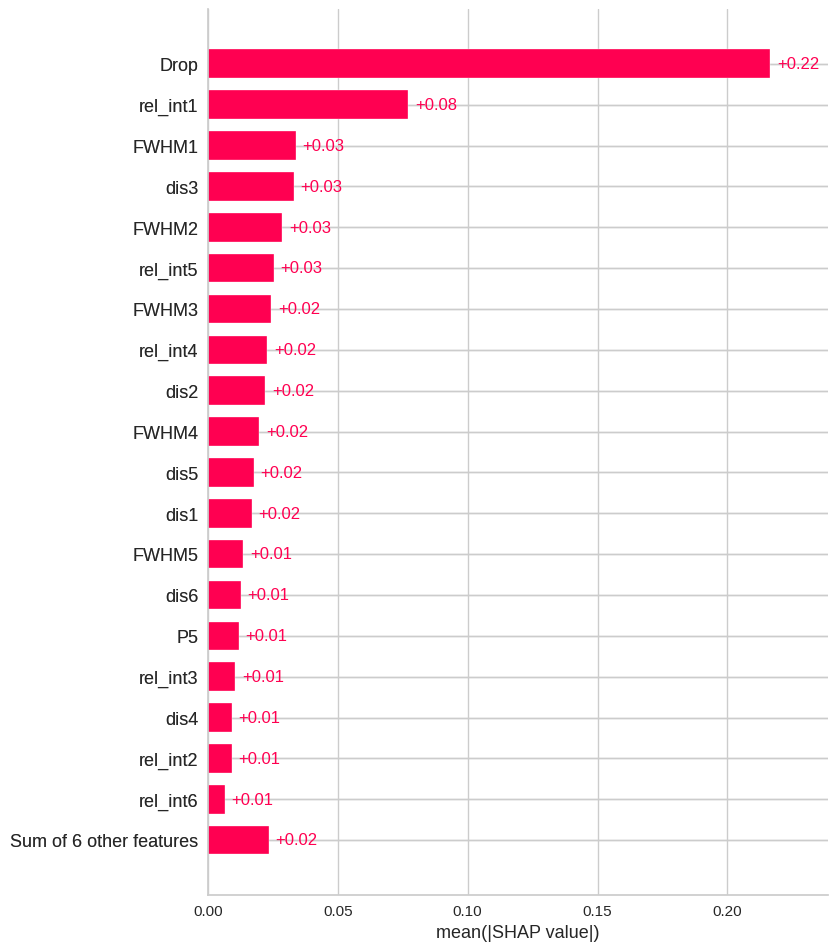

In [39]:
explainer = shap.Explainer(gbr, X)
shap_values = explainer(X)
shap.plots.bar(shap_values,max_display=20)



---



**XRD + PL + UV parameters with only relative parameters**

In [40]:
data_rel = data.drop(columns=['PL_intensity_1', 'PL_intensity_2',
                               'Int1','Int2','Int3','Int4','Int5','Int6'])

In [41]:
X = data_rel.drop('delta(eff)', axis=1)
y = data_rel['delta(eff)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5802)

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.012, max_depth=10, min_samples_split=7,loss="huber",random_state=5802)
gbr.fit(X_train, y_train)

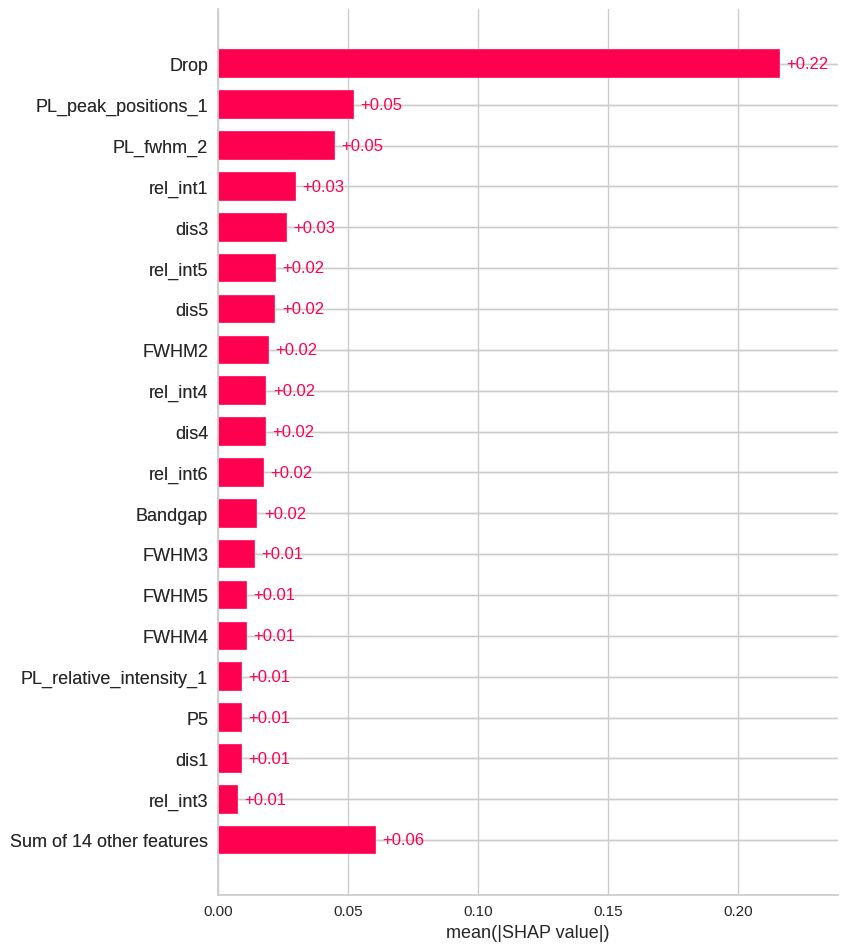

In [43]:
explainer = shap.Explainer(gbr, X)
shap_values = explainer(X)
shap.plots.bar(shap_values,max_display=20)